In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


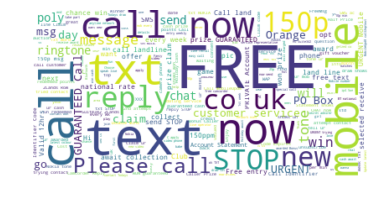

In [5]:
from wordcloud import WordCloud, STOPWORDS
import PIL
import itertools
import matplotlib.pyplot as plt

raw_str=df[df['v1']=='spam']['v2']
raw_str=' '.join(raw_str)
wordcloud = WordCloud( max_words=1000,margin=0, stopwords=STOPWORDS, background_color='white').generate(raw_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

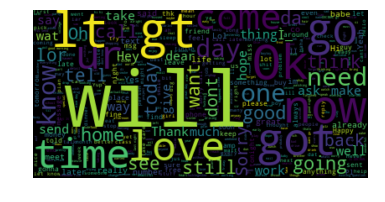

In [6]:
ham_str=" ".join(df[df['v1']=='ham']['v2'])
wordcloud = WordCloud( max_words=1000,margin=0,stopwords=STOPWORDS).generate(ham_str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [7]:
df = df.replace(['ham','spam'],[0, 1])

In [8]:
X = df.iloc[:, 1].values 
y = df.v1.values

In [9]:
def process(x):
    processed_msg = []
 
    for i in range(0, len(x)):
        l = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ',str(x[i]))
        l=re.sub(r'[^a-zA-Z]',' ',l)
        l=re.sub(r'\s+',' ',l)
        l=l.lower()

        processed_msg.append(l)
    return processed_msg

In [10]:
A=process(X)

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state=0)

In [12]:
tfidfconverter = TfidfVectorizer(max_features=3000, min_df=4, max_df=0.9, stop_words=stopwords.words('english'))  
a = tfidfconverter.fit_transform(X_train).toarray()
Xtest = tfidfconverter.transform(X_test).toarray()

Applying Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(a, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
predictions = logmodel.predict(Xtest)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions)) #0.9659192825112107

[[949   0]
 [ 37 129]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       949
           1       1.00      0.78      0.87       166

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

0.9668161434977578


In [16]:
submission = pd.DataFrame() 
submission['id'] = y_test 
submission['target'] = predictions.astype(int)

In [17]:
submission.describe()

,id,target
count,1115.000000,1115.000000
mean,0.148879,0.115695
std,0.356129,0.320002
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000
